<a href="https://www.kaggle.com/code/ahmedrushdi/facemask?scriptVersionId=121667282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install xmltodict

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
# from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import xmltodict
path = "/kaggle/input/face-mask-detection/annotations"
img_path = "/kaggle/input/face-mask-detection/images"

In [3]:
class annotations:
    class __obj:
        def __init__(self, objdict : dict):
#             print(objdict)
            self.label   = objdict['name'  ]
            self.bbox = objdict['bndbox']
            
        def __repr__(self):
            return f'\n\tname={self.name}, bndbox={self.bndbox}'
            
    def __init__(self, annotaion):         
        self.objs = [self.__obj(i) for i in annotaion['object'  ]] if (type(annotaion['object']) == type(list()))\
                    else [self.__obj(annotaion['object'])]

        self.filename = annotaion['filename']
    
    def __repr__(self):
        return f'filename={self.filename}, objs={self.objs}'
        
    def __len__(self):
        return len(objs)
    
    def load(self, images_path):
        file_path = f'{images_path}/{self.filename}'
        print(file_path)
        image = cv2.imread(file_path)
        faces = []
        labels = []
        for obj in self.objs:
            xmin, xmax, ymin, ymax = int(obj.bbox['xmin']), int(obj.bbox['xmax']), int(obj.bbox['ymin']), int(obj.bbox['ymax'])
            faces.append(image[ymin:ymax, xmin:xmax, ...])
            labels.append(obj.label)
        return image, faces, labels
    

In [4]:
# %%debug

sum_len = 0
sum_files = 0
sum_bbox = {'xmin': 0, 'xmax': 0, 'ymin': 0, 'ymax': 0}
annotaionns_list = list()
for index, file_path in enumerate(glob.glob(f"{path}/*.xml")):
    
    with open(file_path) as file:
        x = annotations(xmltodict.parse(file.read())['annotation'])
        annotaionns_list.append(x)
        sum_len += len(x.objs)

/kaggle/input/face-mask-detection/images/maksssksksss737.png


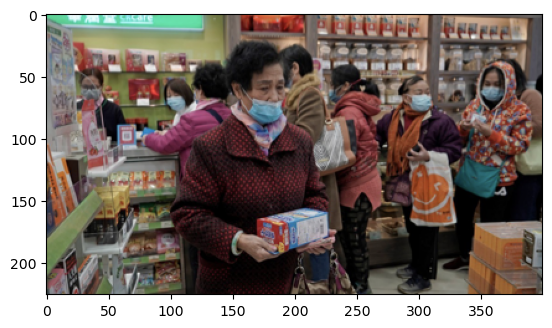

In [5]:
img, x,y =annotaionns_list[0].load(img_path)
plt.imshow(img[...,::-1])

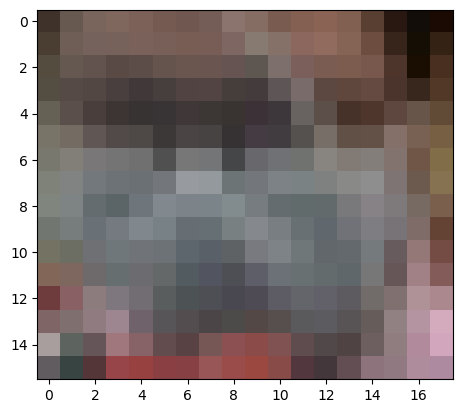

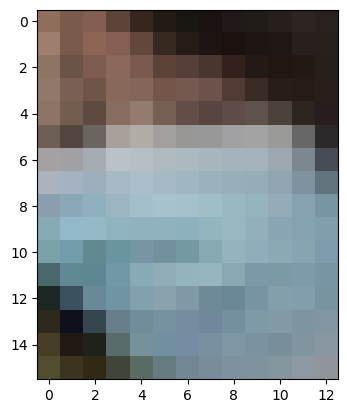

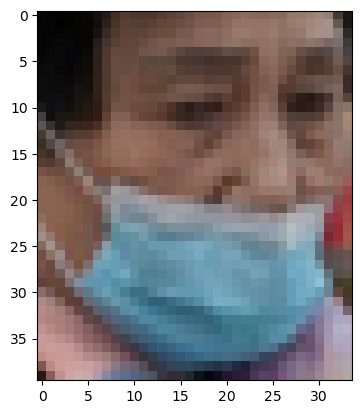

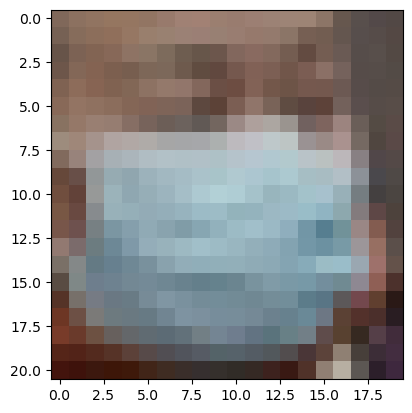

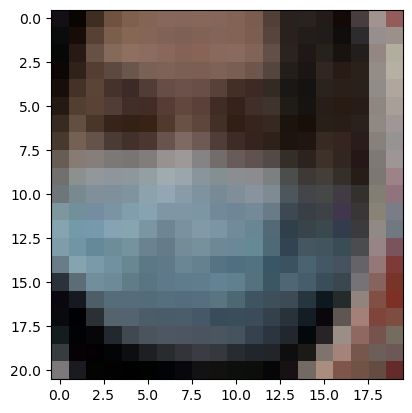

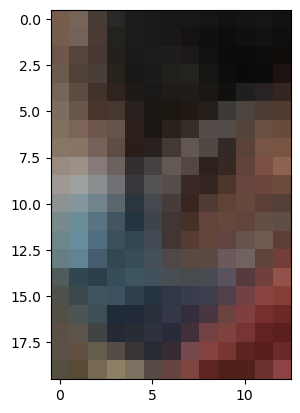

In [6]:
for i in x:
    plt.imshow(i[...,::-1])
    plt.show()

In [7]:
img *= 0

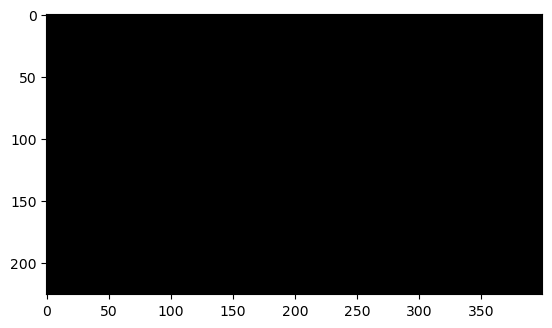

In [8]:
plt.imshow(img)

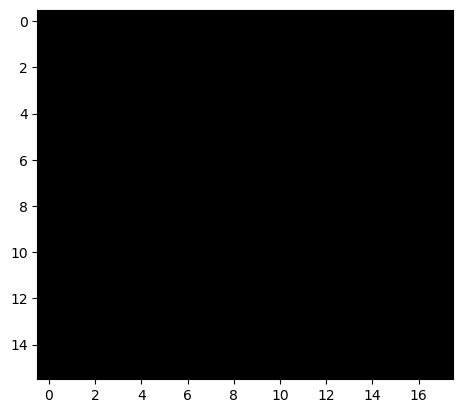

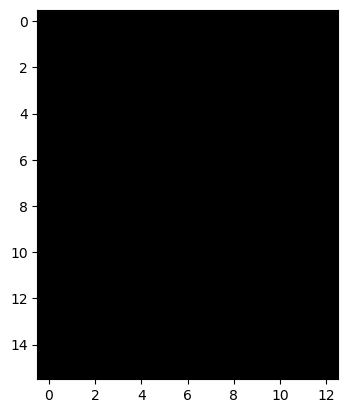

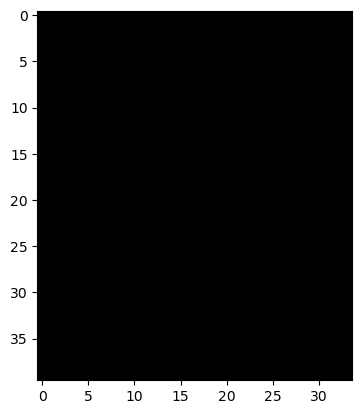

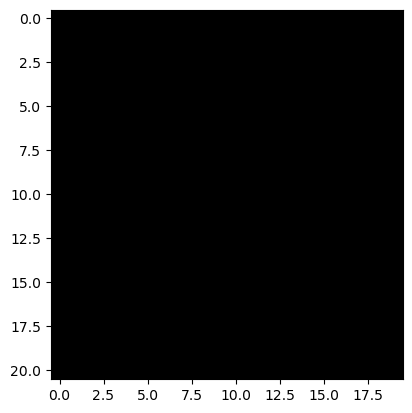

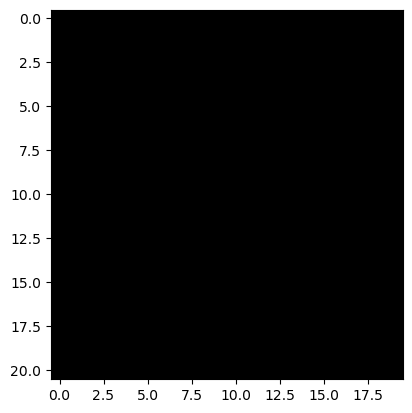

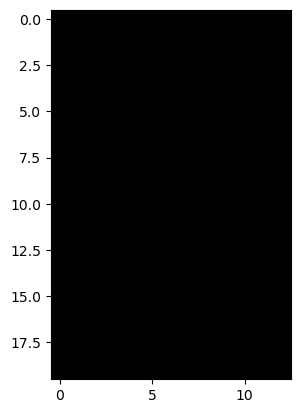

In [9]:
for i in x:
    plt.imshow(i)
    plt.show()